In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
df=pd.read_csv("/content/sample_data/Churn.csv",index_col=[0])

In [110]:
df.shape

(7043, 20)

# New section

In [111]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [112]:
# checking for null_values:
df.isnull().sum().sum()

0

from above there is no null values in the dataset

In [113]:
# geting numeric and categorical seperately
cat_df=df.select_dtypes(exclude=np.number)
int_df=df.select_dtypes(include=np.number)

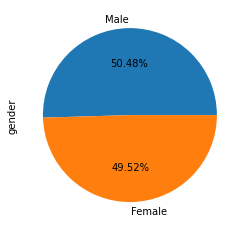

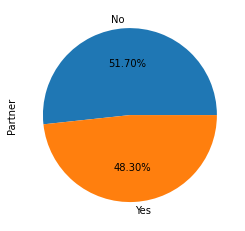

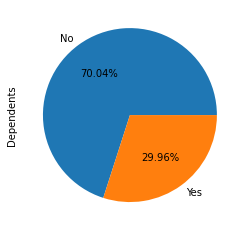

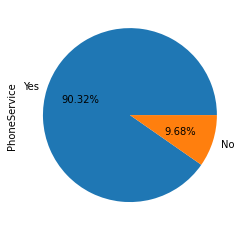

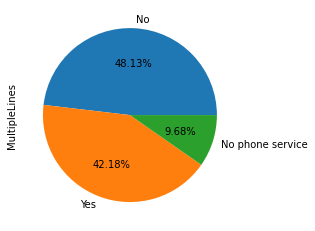

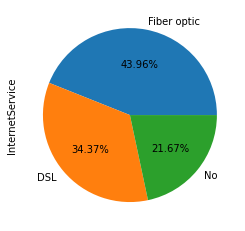

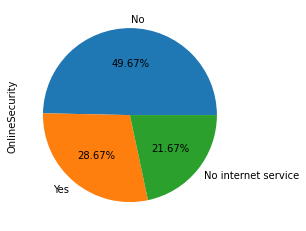

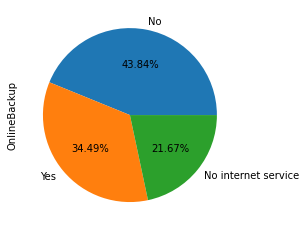

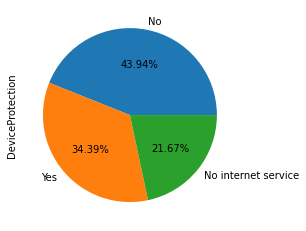

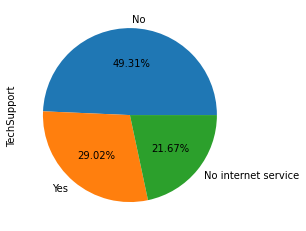

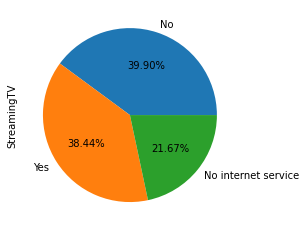

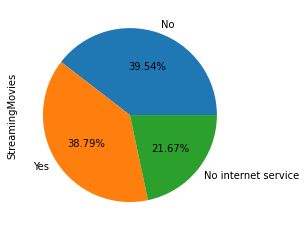

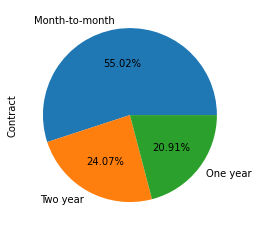

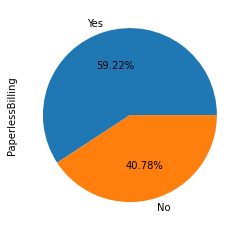

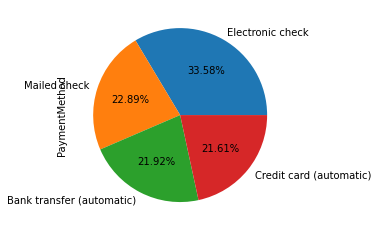

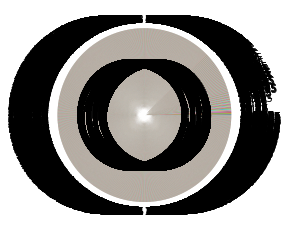

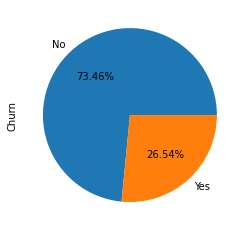

In [114]:
for i in cat_df.columns:
    df[i].value_counts().plot(kind="pie",autopct="%.2f%%")
    plt.show()

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [116]:
for i in cat_df.columns:
    print(i)
    print(df[i][df[i]==' '])

gender
Series([], Name: gender, dtype: object)
Partner
Series([], Name: Partner, dtype: object)
Dependents
Series([], Name: Dependents, dtype: object)
PhoneService
Series([], Name: PhoneService, dtype: object)
MultipleLines
Series([], Name: MultipleLines, dtype: object)
InternetService
Series([], Name: InternetService, dtype: object)
OnlineSecurity
Series([], Name: OnlineSecurity, dtype: object)
OnlineBackup
Series([], Name: OnlineBackup, dtype: object)
DeviceProtection
Series([], Name: DeviceProtection, dtype: object)
TechSupport
Series([], Name: TechSupport, dtype: object)
StreamingTV
Series([], Name: StreamingTV, dtype: object)
StreamingMovies
Series([], Name: StreamingMovies, dtype: object)
Contract
Series([], Name: Contract, dtype: object)
PaperlessBilling
Series([], Name: PaperlessBilling, dtype: object)
PaymentMethod
Series([], Name: PaymentMethod, dtype: object)
TotalCharges
customerID
4472-LVYGI     
3115-CZMZD     
5709-LVOEQ     
4367-NUYAO     
1371-DWPAZ     
7644-OMVMY   

In [117]:
# from the above, we have found there is some empty spaces are found in total charges columns and it must be a numerical feature
cat_df["TotalCharges"][cat_df["TotalCharges"]==' ']=0
cat_df["TotalCharges"]=cat_df["TotalCharges"].astype("float")


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


STATISTICAL ANALYSIS

* To check internet service has effect on Churn
* Hypothesis_testing
* chi_square test



Null_hypothesis      : internet Service has no effect on churn

Alternate_hypothesis : internet Service has significant effect on churn

In [118]:
inter_churn=pd.crosstab(cat_df["InternetService"],df["Churn"])
inter_churn

Churn,No,Yes
InternetService,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113


In [119]:
# chi2_contingency--> 
from scipy.stats import chi2_contingency
stat,pval,dof,val=chi2_contingency(inter_churn)
if pval<0.05:   # considering (95% confidence interval)
    print("We reject Null_Hypothesis")
    print("Internet Service has significant effect on churn")
else:
    print("We fail to reject Null_Hypothesis")
    print("Internet Service has no effect on churn")
    

We reject Null_Hypothesis
Internet Service has significant effect on churn


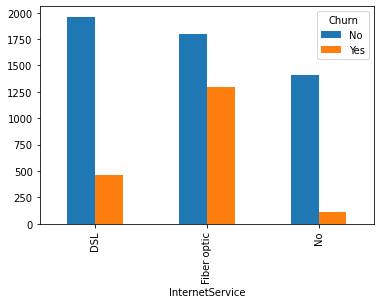

In [120]:
# Post hoc analysis:
inter_churn.plot(kind="bar")
plt.show()

In [121]:
# from the bar graph, we can clearly figureout that Churn yes customers are not Same in diferent Service preference
# churn_yes for fiber_optic users is greater in numbers

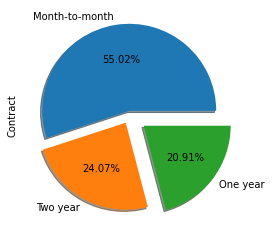

In [122]:
df["Contract"].value_counts().plot(kind="pie",autopct="%.2f%%",shadow=True,explode=[0.05,0.1,0.2])
plt.show()

In [123]:
# from the graph, Number of customers in month_month contract is high

# Strategy to pull them to year wise subscription like:one year subscription + (0.5 years) free



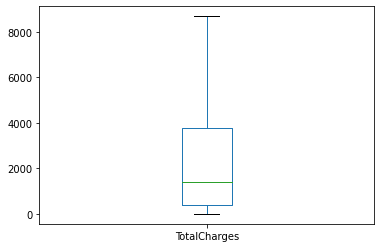

In [124]:
cat_df["TotalCharges"].plot(kind='box')
plt.show()

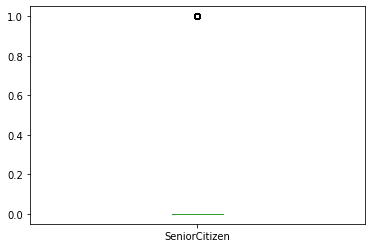

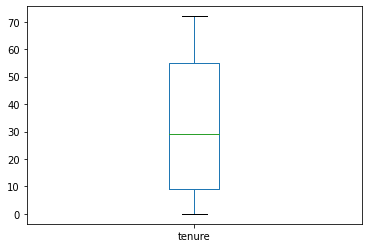

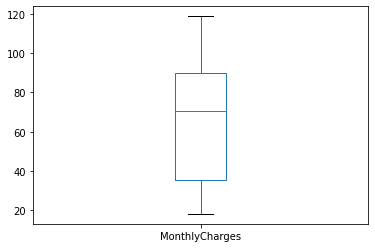

In [125]:
for i in int_df.columns:
    df[i].plot(kind="box")
    plt.show()

In [126]:
# senior citizen is one hot encoded column
# outliers is not present


Improving customer service is at the prime aim to avoid customer churn

Another way to avoid customer churn is to build customer loyalty through relevant experiences and personalized service.

This includes identifying customers who are at risk of churning and working to improve their satisfaction.

### Supervised Machine Learning_modelling:

Model Building:


In [127]:
final_df=pd.concat([cat_df,int_df],axis=1)

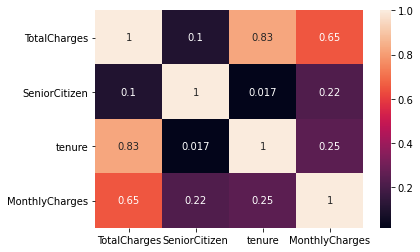

In [128]:
sns.heatmap(final_df.corr(),annot=True)

In [129]:
final_df=pd.get_dummies(final_df,drop_first=True)

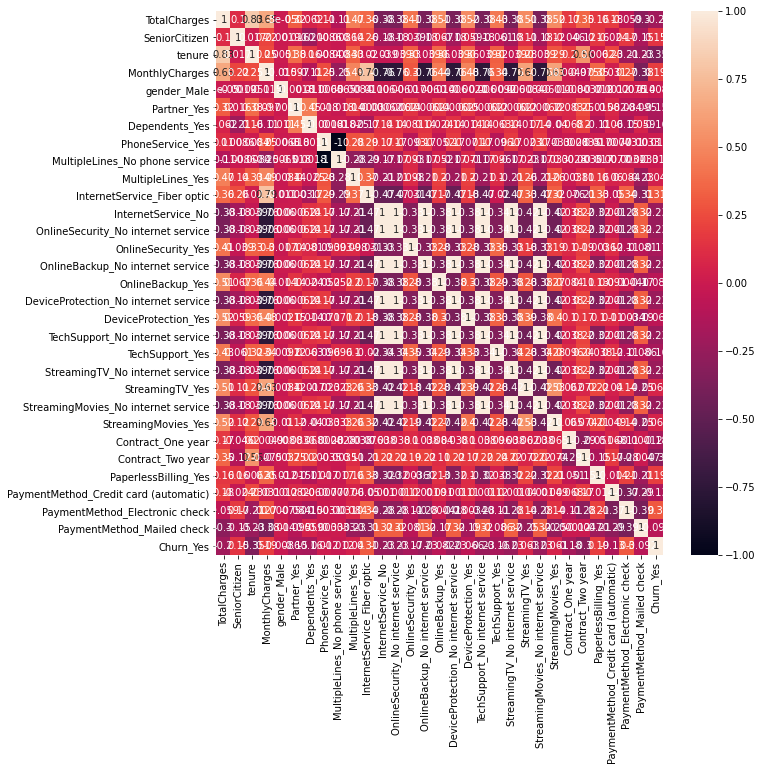

In [130]:
plt.figure(figsize=(10,10))
sns.heatmap(final_df.corr(),annot=True)
plt.show()

In [131]:
one_cor=final_df.corr()["InternetService_No"]

In [132]:
one_cor[one_cor==1]

InternetService_No                      1.0
OnlineSecurity_No internet service      1.0
OnlineBackup_No internet service        1.0
DeviceProtection_No internet service    1.0
TechSupport_No internet service         1.0
StreamingTV_No internet service         1.0
StreamingMovies_No internet service     1.0
Name: InternetService_No, dtype: float64

In [133]:
# these above columns will definetely same and end up in Multicolinearity effect in our model

In [134]:
drop_co=list(one_cor[one_cor==1].index[1:])

In [135]:
final_df=final_df.drop(drop_co,axis=1)

In [136]:
# Multicollinearity  removal using Variance inflation factor

In [137]:
inp=final_df.drop("Churn_Yes",axis=1)
inp=inp-inp.mean()

In [138]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(inp.values,i) for i in range(inp.shape[1])]
vif['feature']=inp.columns
vif.sort_values('VIF',ascending=False)

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,feature
7,inf,PhoneService_Yes
8,inf,MultipleLines_No phone service
3,865.062147,MonthlyCharges
10,148.263380,InternetService_Fiber optic
11,104.217482,InternetService_No
17,24.110253,StreamingMovies_Yes
16,24.056827,StreamingTV_Yes
0,10.793729,TotalCharges
2,7.527280,tenure
9,7.273906,MultipleLines_Yes


In [139]:
inp=inp.drop("PhoneService_Yes",axis=1)
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(inp.values,i) for i in range(inp.shape[1])]
vif['feature']=inp.columns
vif.sort_values('VIF',ascending=False)

,VIF,feature
3,865.062147,MonthlyCharges
9,148.263380,InternetService_Fiber optic
10,104.217482,InternetService_No
7,34.861565,MultipleLines_No phone service
16,24.110253,StreamingMovies_Yes
15,24.056827,StreamingTV_Yes
0,10.793729,TotalCharges
2,7.527280,tenure
8,7.273906,MultipleLines_Yes
13,6.922434,DeviceProtection_Yes


In [140]:
inp=inp.drop("MonthlyCharges",axis=1)
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(inp.values,i) for i in range(inp.shape[1])]
vif['feature']=inp.columns
vif.sort_values('VIF',ascending=False)

,VIF,feature
0,10.763757,TotalCharges
2,7.514688,tenure
9,2.756681,InternetService_No
17,2.632236,Contract_Two year
8,2.400432,InternetService_Fiber optic
20,1.976104,PaymentMethod_Electronic check
21,1.860354,PaymentMethod_Mailed check
15,1.737643,StreamingMovies_Yes
14,1.723319,StreamingTV_Yes
16,1.622015,Contract_One year


In [141]:
out=final_df["Churn_Yes"]

In [142]:
# to avoid multicollinearity, we have removed some columns.

In [143]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(inp,out,test_size=0.3,random_state=40)


In [144]:
# Standard_Scaling:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain_sc=pd.DataFrame(sc.fit_transform(xtrain),columns=xtrain.columns,index=xtrain.index)
xtest_sc=pd.DataFrame(sc.transform(xtest),columns=xtest.columns,index=xtest.index)

In [145]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score,KFold
from sklearn.ensemble import GradientBoostingClassifier

In [146]:
kf=KFold(n_splits=5,shuffle=True,random_state=0)
clf1 = LogisticRegression(max_iter=3000)
clf2 = KNeighborsClassifier(n_neighbors=5) 
clf3=  RandomForestClassifier(random_state=0)
clf4= GaussianNB()
clf5=GradientBoostingClassifier(random_state=0)
clf6=DecisionTreeClassifier()

In [147]:
for i,j in zip([clf1,clf2,clf3,clf4,clf5,clf6],['LR','KNN','RF','GNB','GBC','DT']):
    score_vot = cross_val_score(i, xtrain_sc, ytrain, cv=kf, scoring='f1')
    print(j,np.mean(score_vot),np.std(score_vot))

LR 0.6113939953524254 0.021900323468325104
KNN 0.5372969048962402 0.014926315053028917
RF 0.5665177089406488 0.022079968860624008
GNB 0.6326307699243415 0.014171639116594942
GBC 0.6034516982642757 0.023149969566449335
DT 0.5093697448916894 0.004102182292308502


 Random Forest performs well comparatively   in terms of bias and variance error.

 
 Here, we are focusing on F1 because both false positive and false negative is considered .

Top performance can further enhanced by reducing imbalanced data by Smote analysis


In [148]:
#!pip install imblearn

Trying to balance the data to make the model to learn equally about Churn_Yes and Churn_No using 


* SMOTE[*up sampling*]

* NearMiss[*down sampling*]

In [149]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline

In [150]:
final_df["Churn_Yes"].value_counts()


0    5174
1    1869
Name: Churn_Yes, dtype: int64

In [151]:
count_class_0=4174
count_class_1=2869
pipe=make_pipeline(SMOTE(sampling_strategy={1:count_class_1}),NearMiss(sampling_strategy={0:count_class_0}))
inp_bal,out_bal=pipe.fit_resample(inp,out)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [152]:
inp_bal=pd.DataFrame(inp_bal,columns=inp.columns,index=inp.index)
out_bal=pd.Series(out_bal,index=out.index)

In [153]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(inp_bal,out_bal,test_size=0.3,random_state=40)


In [154]:
# Standard_Scaling:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain_sc=pd.DataFrame(sc.fit_transform(xtrain),columns=xtrain.columns,index=xtrain.index)
xtest_sc=pd.DataFrame(sc.transform(xtest),columns=xtest.columns,index=xtest.index)

In [155]:
for i,j in zip([clf1,clf2,clf3,clf4,clf5,clf6],['LR','KNN','RF','GNB','GBC','DT']):
    score_vot = cross_val_score(i, xtrain_sc, ytrain, cv=kf, scoring='f1')
    print(j,np.mean(score_vot),np.std(score_vot))

LR 0.6742263185595488 0.01164756919187386
KNN 0.6744611296488344 0.016465251887446047
RF 0.7208019258363642 0.016969664208015663
GNB 0.7018239416185841 0.01641630432436083
GBC 0.7331950715562203 0.016026462067090744
DT 0.6610965339081093 0.00960681456580442


#### Final model building on Random_Forest

In [156]:
final_rF=clf3.fit(xtrain_sc,ytrain)
ypred=final_rF.predict(xtest_sc)

In [157]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score

In [158]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1224
           1       0.78      0.70      0.74       889

    accuracy                           0.79      2113
   macro avg       0.79      0.78      0.78      2113
weighted avg       0.79      0.79      0.79      2113



Here, F1 score is 0.73


To know which variable's information gain is high,
 model.feature_importances is being performed.

In [159]:

yprob1=final_rF.predict_proba(xtest_sc)[:,1]
print(roc_auc_score(ytest,yprob1))

0.8611111111111113


Roc_Auc_Score is 0.87.

In [160]:
Feature_Importance=list(final_rF.feature_importances_)
FI=pd.DataFrame({"Feature_importance":Feature_Importance},index=inp.columns)
FI.sort_values(by="Feature_importance",ascending=False)


,Feature_importance
TotalCharges,0.199170
tenure,0.160210
PaymentMethod_Electronic check,0.080120
InternetService_Fiber optic,0.075619
PaperlessBilling_Yes,0.042295
OnlineSecurity_Yes,0.036737
gender_Male,0.032497
SeniorCitizen,0.032479
TechSupport_Yes,0.030915
Contract_One year,0.030606


From the feature importance, we can conclude that TotalCharges plays a vital role in classifying Churn_yes followed by 
2--> Tenure

# Insights from the work

. Data cleaning including missing values, outliers and multi-collinearity is being performed 

. After building various predictive churn model, Random Forest Classifier is choosed as Final Predictive Model

. variables to be included in the model:

        * After One hot encoding (get_dummies), internet_no_service dupilicated columns are removed
        * Other columns like Monthly charges and Phone service are removed because they  involved in Multicollinearity effect
        * All other variables are taken into predictive_modelling.
      
. The performance of the model:

        * F1_score: It is the harmonic mean of Recall and Precision
        * F1_score for our modeling is  73%
        * Roc_Auc_score is 87%


. Key Factors in predicting customer_churn are 

        * TotalCharges  ---> makes sense
        * tenure        ---> makes sense
        * Payment_mode  ---> not makes sense

# Business Solution:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


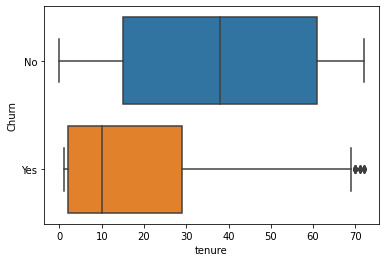

In [161]:
sns.boxplot("tenure","Churn",data=df)
plt.show()

 We should try increasing the tenure period. 
 Offers like :
 * year subscription + (0.5 years free)
 * Most of the customer are not availing internet services, we should try to pull them by providing offers on gadgets that require internet services.
 * Customer Churn is a serious threat to a company because its hard to have a new customer rather holding a older in tact to the business.